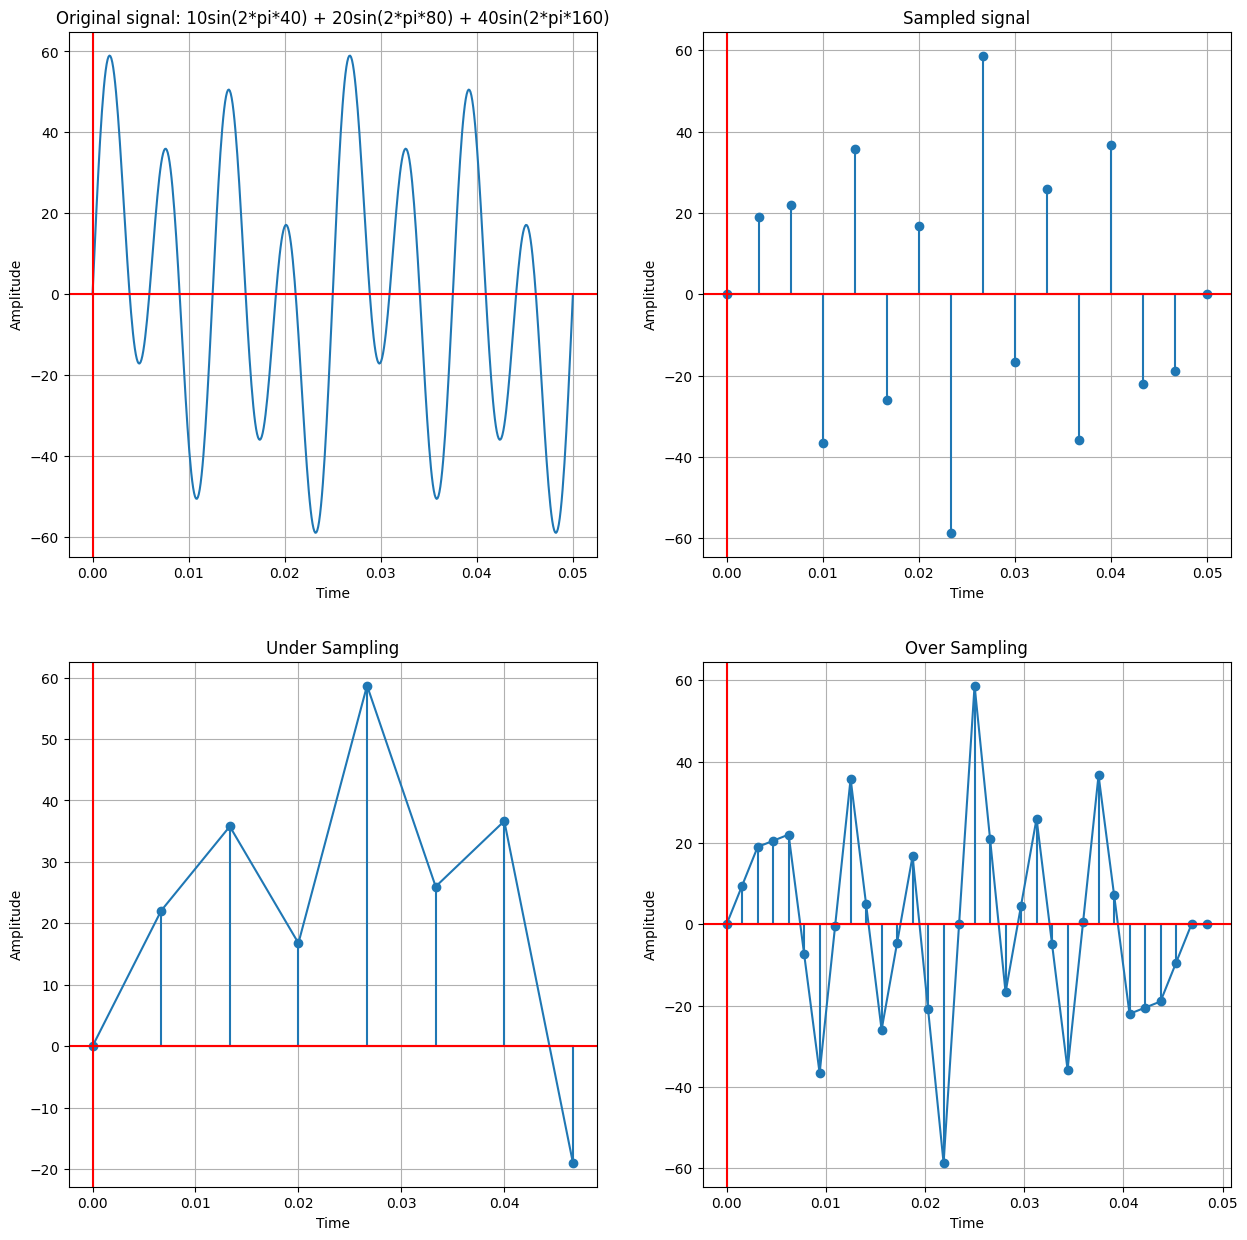

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath



f1 = 40
f2 = 80
f3 = 160

a1 = 10
a2 = 20
a3 = 40

N = 512
start = 0
end = 0.05
#sample_counts = 10000 * (end-start)

#t = np.linspace(start, end, int(sample_counts), endpoint=False)
t = np.linspace(start, end, N)
y = a1*np.sin(2*np.pi * f1 * t) + a2*np.sin(2*np.pi * f2 * t) + a3*np.sin(2*np.pi * f3 * t)
#Original signal
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.plot(t,y)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Original signal: 10sin(2*pi*40) + 20sin(2*pi*80) + 40sin(2*pi*160)")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
N = 512
start = 0
end = 0.05
nyquist_rate = 160*2
sample_counts = nyquist_rate * (end-start)

x = np.linspace(start, end, int(sample_counts))
y_sampled = a1*np.sin(2*np.pi * f1 * x) + a2*np.sin(2*np.pi * f2 * x) + a3*np.sin(2*np.pi * f3 * x)

x_dft = x
y_dft = y_sampled

#x = x[:20]
#y_sampled = y_sampled[:20]


#Sampled signal at  Nyquist rate
plt.subplot(2,2,2)
plt.stem(x,y_sampled)
#plt.plot(x,y_sampled)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Sampled signal")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

#Under sampling
factor = 2
plt.subplot(2,2,3)
plt.stem(x[::factor],y_sampled[::factor])
plt.plot(x[::factor],y_sampled[::factor])
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Under Sampling")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

#Over sampling
over_sample = np.zeros(2*len(x[:]))
over_sample[::2] = y_sampled[:]
over_sampled_time = np.arange(len(over_sample))/(nyquist_rate*factor)

for i in range(1,len(over_sample)-1, 2):
    over_sample[i] = (over_sample[i-1] + over_sample[i+1])/2
    
#over_sample[1::2] = np.interp(over_sampled_time[1::2], x[:20], y_sampled[:20])

plt.subplot(2,2,4)
plt.stem(over_sampled_time, over_sample)
plt.plot(over_sampled_time, over_sample)
plt.axhline(color = 'r')
plt.axvline(color = 'r')
plt.title("Over Sampling")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.show()